# # iris flower classification using knn algrithem

In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline 


In [12]:
data=pd.read_csv("iris.csv")

In [13]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## analysis the data

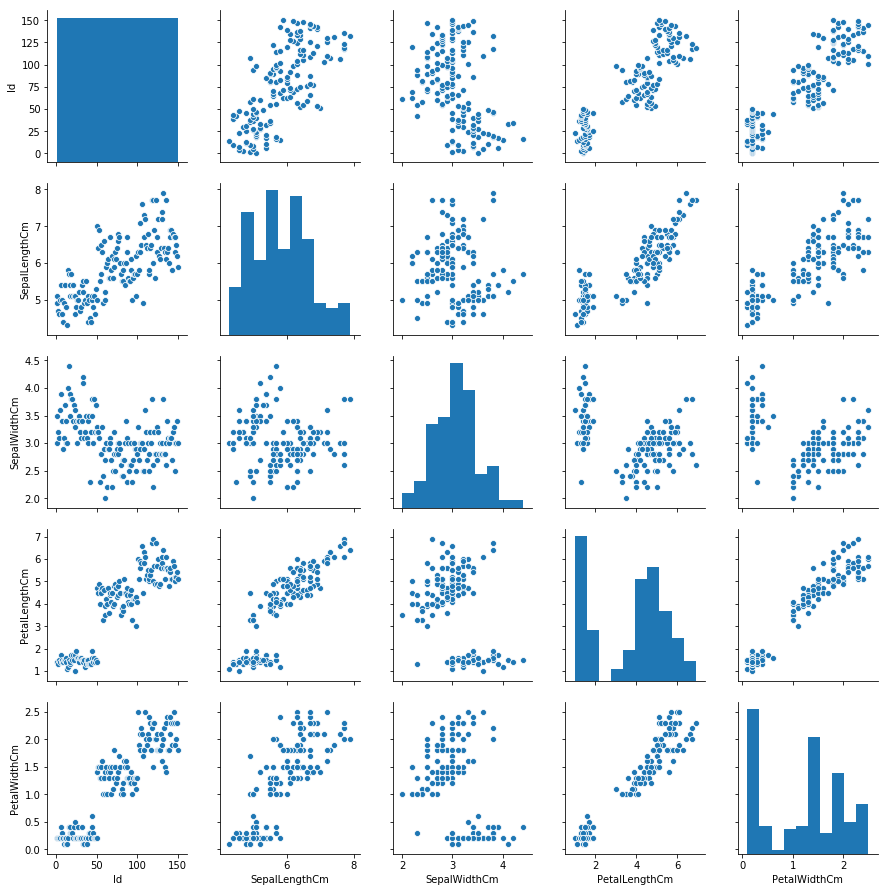

In [14]:
sns.pairplot(data)
plt.show()

# scaling the  data for better prediction

In [49]:
#scaling of object
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(data.drop('Species',axis=1))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
feature=sc.transform(data.drop('Species',axis=1))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [59]:
feature = pd.DataFrame(feature,columns=data.columns[:-1])

In [70]:
feature.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977


## spliting the data into training and testing variABLES

In [71]:
x_train,x_test,y_train,y_test=train_test_split(feature,data['Species'],test_size=0.3)

# finding the error rate for different value of k

In [72]:
error_rate=[]
for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    error=np.mean(pred!=y_test)
    error_rate.append(error)


# visualising the error for different value of k in model

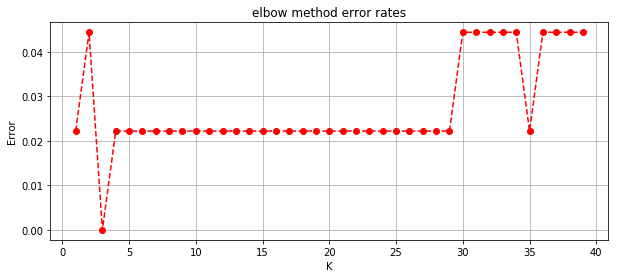

In [73]:

plt.figure(figsize=(10,4))
plt.title("elbow method error rates")
plt.plot(np.arange(1,40),error_rate,'ro--')
plt.xlabel("K")
plt.ylabel("Error")
plt.grid()
plt.show()

# so we take the k=4 as the value of k
# if we have multiple value of k where error is minimum then check the accuracy of each value where the error rate is minimum and select the more effective value of k

In [75]:

# for checking the acuracy score of the model for the k=4 value
model=KNeighborsClassifier(n_neighbors=4)
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [76]:
pred[:5]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor'], dtype=object)

In [81]:
# for checking the performence of the model
print("confussion_matix",confusion_matrix(y_test,pred))

confussion_matix [[13  0  0]
 [ 0 22  0]
 [ 0  1  9]]


In [77]:
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.96      1.00      0.98        22
 Iris-virginica       1.00      0.90      0.95        10

      micro avg       0.98      0.98      0.98        45
      macro avg       0.99      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [79]:
print("accuracy score",accuracy_score(y_test,pred))

accuracy score 0.9777777777777777


In [ ]:
#thank you